# Lab 1 - Fitting Probability Models

This lab has been converted to Python by Daniel Worrall. Any errors are my fault. (But Daniel has graduated now, so talk to the TA's).

In this lab, we will cover three different ways to fit probability distributions to data. We shall have a set of data points, _X_, for which we wish to learn the parameters for a given probability distribution. Here, our data is one dimensional and continuous, so we shall focus on fitting a univariate normal distribution.

You will find three MATLAB files in which you should fill in the **TODOs** sections. 

- `pract1_a.m`
Here we will use maximum likelihood (ML) to find the parameters of the normal distribution which is most likely given the data.

- `pract1_b.m`
In the second part of the lab we shall introduce some prior information about the parameters and find the maximum a posteriori (MAP) fit.

- `pract1_c.m`
Finally, we shall cover parameter estimation from a Bayesian perspective.

# Lab 1: Part A
We will use maximum likelihood (ML) to fit both parameters ($\mu$ and $\sigma$) of a univariate normal distribution to the data.

In [33]:
%load_ext autoreload
%autoreload 2

# For matrices
import numpy as np

# For plotting
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.rc('font', size=15)

# Our custom modules
from normal import *
from log_normal import *
from plot_normal import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
# Generate some data points from a normal distribution
mu = 1     # mean
sigma = 2  # standard deviation = sqrt(variance)
N = 20     # number of datapoints

X = mu + sigma*np.random.randn(N,1) 

## ML Parameter Estimation of normal

### TODO 1
On paper derive the ML parameter estimates for the normal distribution and then insert the equations here. Note: For today, it's safe to assume that the data points were generated independently of each other.

In [37]:
# Replace this
muML = np.sum(X) / N
varML = (np.sum((X-muML)**2))/N
sigmaML = varML**0.5

print(muML)
print(sigmaML)

0.8649575537261402
1.6520828421653801


Text(0.5, 1.0, 'ML parameter fitted distribution')

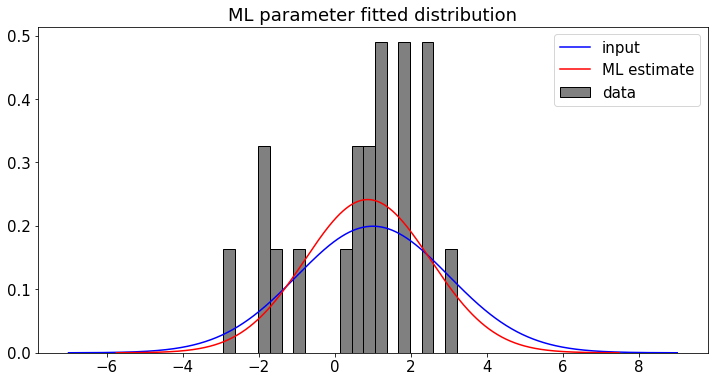

In [35]:
# Plotting univariate normal
# Normalizing histograms - assuming bins are evenly sized
[hist_count, bin_edges] = np.histogram(X, 20)
bin_width = bin_edges[1] - bin_edges[0]
hist_pos = (bin_edges[1:] + bin_edges[:-1]) / 2.

# Plot figure
plt.bar(bin_edges[:-1], hist_count/(np.sum(hist_count)*bin_width), color='gray', 
        edgecolor='k', width=bin_width, label='data')
plot_normal(mu, sigma, 'b', 'input')
plot_normal(muML, sigmaML, 'r', 'ML estimate')
plt.legend()
plt.title('ML parameter fitted distribution')


### Likelihood function

In [25]:
offset = 1.
sigma_range = np.linspace(sigma-offset, sigma+offset, num=int(2.*offset / 0.01))
mu_range = np.linspace(mu-offset, mu+offset, num=int(2.*offset / 0.01))

## Note
In the code below, there may be nothing missing, but functions like `normal()` and `log_normal()` (which are in separate files) are being called, yet are potentially blank. To accomplish these __TODO__s, fill them in!

### TODO 2
Compute the likelihood function for the normal distribution: See `normal.py`
### TODO 3
Empirically verify that the maximum is at the same position as your ML solution
### TODO 4
Compute the log-likelihood function and verify that it has the same maximum: See `log_normal.py`

In [38]:
print(muML, sigmaML)


0.8649575537261402 1.6520828421653801


You do not need to edit the next section. Just run it to plot the results of your adapted `normal.py` and `log_normal.py`.

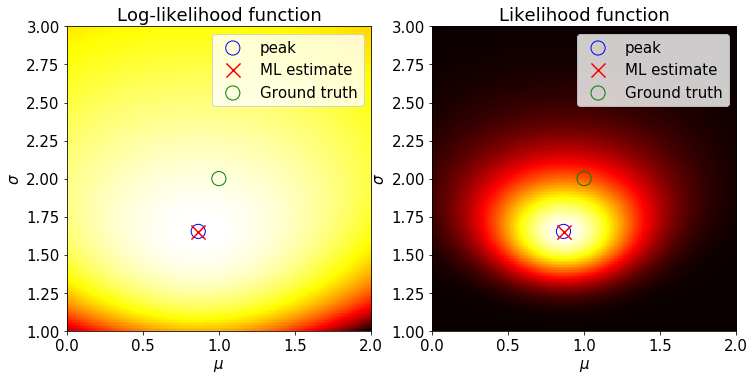

In [41]:
# BRUTE FORCE COMPUTE the likelihood and log-likelihood functions.
# NOTE: this is a silly way to use Python. Ideally we would exploit
# numpy's fast vector maths, but alas, this is easier to understand

lfun = np.zeros((len(sigma_range), len(mu_range)))
llfun = np.zeros((len(sigma_range), len(mu_range)))

for i, m in enumerate(mu_range):
    for j, s in enumerate(sigma_range):
        lfun[j,i] = normal(X, m, s)       # Edit the original function in normal.py
        llfun[j,i] = log_normal(X, m, s)  # Edit the original function in log_normal.py

        
# PLOTTING
## Plot log-likelihood function
plt.subplot(1,2,1)
plt.imshow(llfun, cmap="hot", origin="lower", 
           extent=[mu_range[0], mu_range[-1], sigma_range[0], sigma_range[-1]])
plt.xlabel("$\mu$")
plt.ylabel("$\sigma$")
plt.title("Log-likelihood function")

### Maximum of log-likelihood function
flat_idx = np.argmax(llfun)
sigma_idx, mu_idx = np.unravel_index(flat_idx, llfun.shape)
mu_max = mu_range[mu_idx]
sigma_max = sigma_range[sigma_idx]
val = llfun[mu_idx, sigma_idx]

### Plot points
plt.scatter(mu_max, sigma_max, facecolors='none', edgecolors='b', marker='o', s=200, label='peak')
plt.scatter(muML, sigmaML, color='r', marker='x', s=200, label='ML estimate')
plt.scatter(mu, sigma, facecolors='none', edgecolors='g', marker='o', s=200, label='Ground truth')
plt.legend()

## Plot likelihood function
plt.subplot(1,2,2)
plt.imshow(lfun, cmap="hot", origin="lower", 
           extent=[mu_range[0], mu_range[-1], sigma_range[0], sigma_range[-1]])
plt.xlabel("$\mu$")
plt.ylabel("$\sigma$")
plt.title("Likelihood function")

### Maximum of log-likelihood function
flat_idx = np.argmax(lfun)
sigma_idx, mu_idx = np.unravel_index(flat_idx, llfun.shape)
mu_max = mu_range[mu_idx]
sigma_max = sigma_range[sigma_idx]
val = llfun[mu_idx, sigma_idx]

### Plot points
plt.scatter(mu_max, sigma_max, facecolors='none', edgecolors='b', marker='o', s=200, label='peak')
plt.scatter(muML, sigmaML, color='r', marker='x', s=200, label='ML estimate')
plt.scatter(mu, sigma, facecolors='none', edgecolors='g', marker='o', s=200, label='Ground truth')
plt.legend()